In [26]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 
import re
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

# https://matplotlib.org/3.1.1/tutorials/introductory/customizing.html
sns.set(rc={"axes.facecolor":"white", "axes.edgecolor":"black"})

In [15]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [16]:
tips.shape

(244, 7)

### 특정 데이터의 타입을 변환하여 파생변수만들기

In [17]:
# tips의 성별데이터를 문자열로 변환 후 새로운 변수 생성
tips["sex_str"] = tips["sex"].astype(str)
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
sex_str       244 non-null object
dtypes: category(4), float64(2), int64(1), object(1)
memory usage: 9.1+ KB


In [18]:
# 10.123 → "10.123"
tips["total_bill"] = tips["total_bill"].astype(str)
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
total_bill    244 non-null object
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
sex_str       244 non-null object
dtypes: category(4), float64(1), int64(1), object(2)
memory usage: 9.1+ KB


In [19]:
# 10.123 ← "10.123"
tips["total_bill"]=tips["total_bill"].astype(float)
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
sex_str       244 non-null object
dtypes: category(4), float64(2), int64(1), object(1)
memory usage: 9.1+ KB


### 의도치않는 데이터 타입 변경
한 col의 데이터 타입을 전체적으로 바꾸지 않더라도, 일부 데이터의 타입이 바뀐다면 전체 데이터 타입이 바뀌게된다

In [20]:
# total_bill의 타입 float → object 변경됨
tips_sub_miss = tips.head(10)
tips_sub_miss.loc[[1,3,5,7],"total_bill"] = "missing"
tips_sub_miss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
total_bill    10 non-null object
tip           10 non-null float64
sex           10 non-null category
smoker        10 non-null category
day           10 non-null category
time          10 non-null category
size          10 non-null int64
sex_str       10 non-null object
dtypes: category(4), float64(1), int64(1), object(2)
memory usage: 920.0+ bytes


In [21]:
# object(missing)를 float으로 변환 X
tips_sub_miss['total_bill'].astype(float)

ValueError: could not convert string to float: 'missing'

[pandas.to_numeric()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html) <br>
The default return dtype is float64 or int64 depending on the data supplied

In [22]:
pd.to_numeric(tips_sub_miss["total_bill"]) 

ValueError: Unable to parse string "missing" at position 1

In [23]:
# ignore error
pd.to_numeric(tips_sub_miss["total_bill"], errors="ignore") 

# 숫자로 변환 안되는 데이터는 모두 NaN 처리
pd.to_numeric(tips_sub_miss["total_bill"], errors="coerce", downcast="float") 

# 숫자로 변환이 안되는 경우, error 발생
pd.to_numeric(tips_sub_miss["total_bill"], errors="raise") 

ValueError: Unable to parse string "missing" at position 1

In [24]:
# downcast: 큰 자료형 → 작은 자료형으로 변환
tips_sub_miss
pd.to_numeric(tips_sub_miss["total_bill"], errors="coerce",downcast="float") 

0    16.99
1      NaN
2    21.01
3      NaN
4    24.59
5      NaN
6     8.77
7      NaN
8    15.04
9    14.78
Name: total_bill, dtype: float32

## Category 카테고리 자료형 
one-hot encoding 형태의 데이터 타입 <br>  
* 장점: 적은 용량, 효율적인 속도 <br>
만약 주소 데이터가 시,도로 되어있을 경우, 문자형으로 받지 않고 카테고리형으로 받으면 메모리를 적게 차지하게 된다.  


In [25]:
tips.info()
tips["sex_str"] = tips["sex_str"].astype("category")
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
sex_str       244 non-null object
dtypes: category(4), float64(2), int64(1), object(1)
memory usage: 9.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
sex_str       244 non-null category
dtypes: category(5), float64(2), int64(1)
memory usage: 7.6 KB


## 막대 그래프

<BarContainer object of 3 artists>

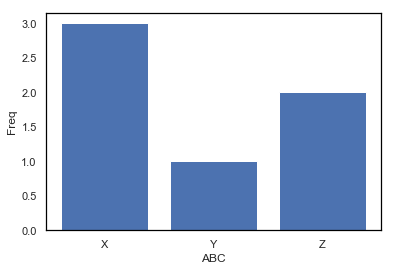

In [27]:
y = [3, 1, 2]
x = np.arange(len(y))

plt.xlabel("ABC") 
plt.ylabel("Freq")
xlabel = ["X", "Y", "Z"]

plt.xticks(x, xlabel) # x축에 x의 범위와 label을 부여
plt.bar(x, y)

In [28]:
data = ["A", "B", "C", "D"]
y_pos = np.arange(len(data))
perform = 2 + 3*np.random.rand(len(data))
perform

array([4.45253936, 2.87095835, 4.49464147, 4.45505906])

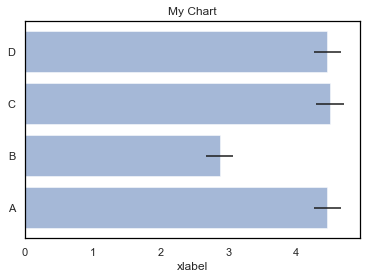

In [29]:
# plot.barh():가로막대 그래프
plt.title("My Chart")
plt.xlabel("xlabel")
plt.barh(y_pos, perform, alpha=0.5, xerr=0.2) # xerr: 0.2의 오차범위
plt.yticks(y_pos,data) # y_pos[0, 1, 2, 3] 각각에 대해서 data 값을 부여
plt.show()

### Stem plot 
그래프 폭이 없는 막대그래프 <br>
이산확률을 나타낼때 종종 활용

<StemContainer object of 3 artists>

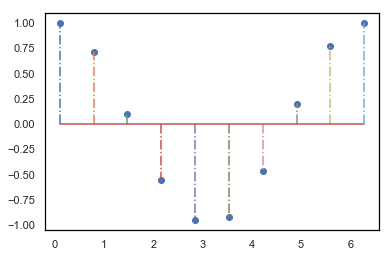

In [30]:
x = np.linspace(0.1, 2*np.pi,10) # 선형 공간 함수, 0.1 ~ 2*3.14 10개 데이터 생성
plt.stem(x,np.cos(x),"-.") # 선, 점으로 구성

## 파이 그래프
* startangle <br>
시각화를 시작하는 각도: 90도, 12시를 기준으로 반시계방향 <br><br>
* explode <br>
원하는 부분 강조 <br><br>
* autopct <br>
각 데이터의 확률 값 <br>
앞에 % 1개, 뒤 %%2개를 해줘야 확률값 1개만 들어간다 <br>
숫자자리확보. 소수 몇째 자리까지 출력할지 <br><br>
[참고](https://matplotlib.org/api/pyplot_summary.html)

([<matplotlib.patches.Wedge at 0x1ebefa4b278>,
 [Text(-0.5235421132720431, 0.9674211366466227, 'Seoul'),
  Text(-1.0073506941587782, -0.4418648876951279, 'Busan'),
  Text(1.0989279397287353, -0.48203462871826674, 'Jeju'),
  Text(0.35716951609773123, 1.040398931550063, 'KwangJu')],
 [Text(-0.2855684254211144, 0.5276842563527032, '15.8%'),
  Text(-0.5494640149956971, -0.24101721147006971, '31.6%'),
  Text(0.6410412981750956, -0.2811868667523222, '42.1%'),
  Text(0.1948197360533079, 0.5674903263000343, '10.5%')])

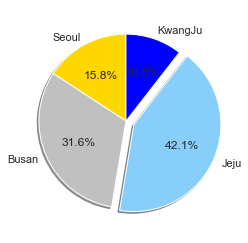

In [76]:
labels = ["Seoul", "Busan", "Jeju", "KwangJu"]
colors = ["gold", "silver", "lightskyblue", "blue"]
sizes = [15, 30, 40, 10] # 합이 100(%)
explode = (0, 0, 0.1, 0) # 떼어냈을 때 간격
plt.pie(sizes, explode=explode, labels=labels, startangle=90, 
        colors=colors, shadow=True, autopct="%1.1f%%") 


## 산점도

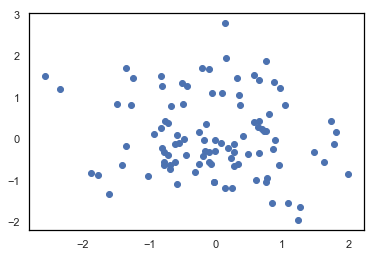

In [35]:
np.random.seed(709)
x = np.random.normal(0, 1, 100)
y = np.random.normal(0, 1, 100)
plt.scatter(x, y)

## 버블 차트

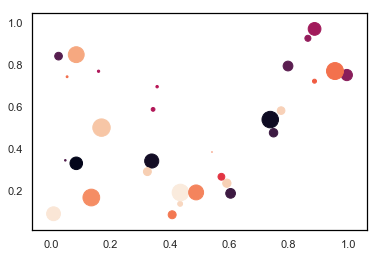

In [38]:
np.random.seed(709)
a = np.random.rand(30)
b1 = np.random.rand(30)
b2 = np.random.rand(30)
b3 = np.pi*(10*np.random.rand(30))**2
plt.scatter(a, b1, c=b2, s=b3) #b2의 값: 색상, b3의 값: 크기 → 결과적으로 4차원 데이터 

## imshow 
2차원 이미지 데이터를 색상으로 출력

In [64]:
from sklearn.datasets import load_digits
digits = load_digits()
print(type(digits))
print(len(digits))

<class 'sklearn.utils.Bunch'>
5


In [43]:
digits.images[0].shape #(8,8): 64개의 픽셀로 구성

(8, 8)

In [46]:
# 0:흰색, 0이 아닌 수: 검은색 으로 생각하면 숫자 3으로 보임
digits.images[3]

array([[ 0.,  0.,  7., 15., 13.,  1.,  0.,  0.],
       [ 0.,  8., 13.,  6., 15.,  4.,  0.,  0.],
       [ 0.,  2.,  1., 13., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 12., 12.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1., 10.,  8.,  0.],
       [ 0.,  0.,  8.,  4.,  5., 14.,  9.,  0.],
       [ 0.,  0.,  7., 13., 13.,  9.,  0.,  0.]])

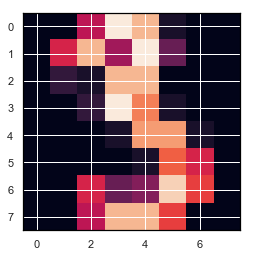

In [58]:
x = digits.images[3] 
plt.imshow(x) # 컬러

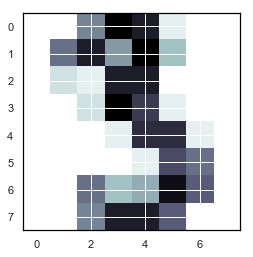

In [48]:
# cmap: 그레이스케일로 변환
# interpolation : 색을 그라데이션으로 나타내 자연스럽게 표현
plt.imshow(x, cmap=plt.cm.bone_r, interpolation="nearest")

## 등고선

In [66]:
def myFunc(x,y):
    return(1-x/2+x**4+y**2)*np.exp(-x**2-y**2) # 임의의 다항식  

x = np.linspace(-3,3,256)
y = np.linspace(-3,3,256)
xx, yy = np.meshgrid(x,y) # meshgrid: 등고선을 그리고자하는 대상데이터를 나타내는 행렬 

In [67]:
xx

array([[-3.        , -2.97647059, -2.95294118, ...,  2.95294118,
         2.97647059,  3.        ],
       [-3.        , -2.97647059, -2.95294118, ...,  2.95294118,
         2.97647059,  3.        ],
       [-3.        , -2.97647059, -2.95294118, ...,  2.95294118,
         2.97647059,  3.        ],
       ...,
       [-3.        , -2.97647059, -2.95294118, ...,  2.95294118,
         2.97647059,  3.        ],
       [-3.        , -2.97647059, -2.95294118, ...,  2.95294118,
         2.97647059,  3.        ],
       [-3.        , -2.97647059, -2.95294118, ...,  2.95294118,
         2.97647059,  3.        ]])

In [68]:
yy

array([[-3.        , -3.        , -3.        , ..., -3.        ,
        -3.        , -3.        ],
       [-2.97647059, -2.97647059, -2.97647059, ..., -2.97647059,
        -2.97647059, -2.97647059],
       [-2.95294118, -2.95294118, -2.95294118, ..., -2.95294118,
        -2.95294118, -2.95294118],
       ...,
       [ 2.95294118,  2.95294118,  2.95294118, ...,  2.95294118,
         2.95294118,  2.95294118],
       [ 2.97647059,  2.97647059,  2.97647059, ...,  2.97647059,
         2.97647059,  2.97647059],
       [ 3.        ,  3.        ,  3.        , ...,  3.        ,
         3.        ,  3.        ]])

In [69]:
zz = myFunc(xx,yy)
zz

array([[1.40877313e-06, 1.57725382e-06, 1.76372864e-06, ...,
        1.70421497e-06, 1.52507759e-06, 1.36308319e-06],
       [1.61901937e-06, 1.81256683e-06, 2.02677279e-06, ...,
        1.95827313e-06, 1.75251250e-06, 1.56643068e-06],
       [1.85860181e-06, 2.08070201e-06, 2.32649364e-06, ...,
        2.24773844e-06, 2.01165654e-06, 1.79813973e-06],
       ...,
       [1.85860181e-06, 2.08070201e-06, 2.32649364e-06, ...,
        2.24773844e-06, 2.01165654e-06, 1.79813973e-06],
       [1.61901937e-06, 1.81256683e-06, 2.02677279e-06, ...,
        1.95827313e-06, 1.75251250e-06, 1.56643068e-06],
       [1.40877313e-06, 1.57725382e-06, 1.76372864e-06, ...,
        1.70421497e-06, 1.52507759e-06, 1.36308319e-06]])

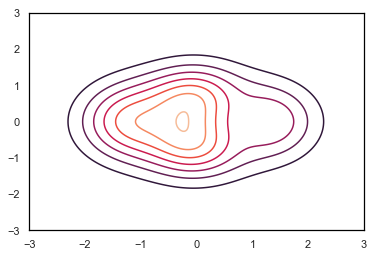

In [73]:
plt.contour(xx, yy, zz)

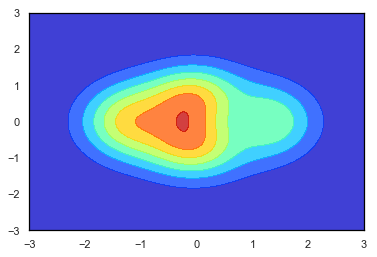

In [74]:
plt.contourf(xx, yy, zz, alpha=0.75, cmap="jet") 

### [Matplotlib api](https://matplotlib.org/api/pyplot_summary.html) 
### [Seaborn](http://seaborn.pydata.org/api.html) 
### [Seaborn Example gallery](http://seaborn.pydata.org/examples/index.html)